### Change params structure and part of *"the core"*.

In [1]:
import json
import random

In [2]:
import attr_funcs

In [9]:
from IPython.display import HTML, SVG

In [3]:
controls = json.load(open('controls.json', 'rt'))

In [18]:
def generate_figure(controls, xmlplus = ''):
    figure = {}
    for k, algorithm in controls.items():
        figure[k] = getattr(attr_funcs, algorithm['func'])(*algorithm['params'])
    if k == 'transform':
        if figure['figures'] == 'circle' or figure['transform'] == 0:
            del figure['transform']
        else:
            figure['transform'] = attr_funcs.transform_rotate(*[figure[k] 
                                  for k in ('x','y','width','height')], angle = figure['transform'])
            
    attr_funcs.streamline_attribs(figure)   

    s = '{}="{}"'
    attrs =[]
    for k, v in figure.items():
        if not k == 'figures': 
            attrs.append(s.format(k, v))
    attrs.sort()
    return '<{} '.format(figure['figures']) + ' '.join(attrs) + ' ' + xmlplus + '/>'

In [121]:
# Generate the figures for the picture
svg_figures = []
for i in range(45):
    xmlplus = 'id="' + str(i+1) + '"'
    svg_figures.append (generate_figure(controls, xmlplus=xmlplus))

In [133]:
svg_header ="""<?xml version="1.0" standalone="no"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink/" width="600px" height="600px" viewBox="0 0 100 100" version="1.2">

  <desc>Picture by J. Wendt</desc>
  <!-- Show outline of canvas using 'rect' element -->
  <rect id="bg-00" x="0" y="0" width="100" height="100" fill="lightblue" opacity="1." stroke="white" stroke-opacity=".7" stroke-width=".01"/>

"""

text = svg_header + '\n'.join(svg_figures) + '\n</svg>\n'

In [35]:
f = open('test02.svg', 'wt')
f.write(text)
f.close()

In [175]:
json.dump(svg_figures,open('svg_figures.json', 'wt'), indent=2)

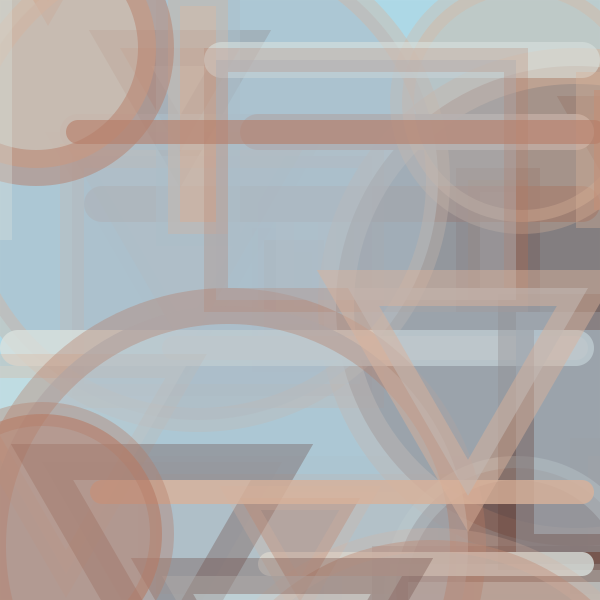

In [173]:
random.shuffle(svg_figures)

text = svg_header + '\n'.join(svg_figures) + '\n</svg>\n'
SVG(text)

### Collect all svg attribute creating functions in  modul *attr-funcs*

In [ ]:
test_method_values ={'random_choice':    ([0,1,2,3], ),
           'random_sample':    [[range(0, 1000, 3), 6], ],
           'random_randint':   [[112, 117], ],
           'random_randrange': [[10,25,2], ],
           'fifo_loop': [[0,1,2,3], ]
           }
for method, values in test_method_values.items():
    print(method, values)
    print([getattr(attr_funcs, method)(*values) for i in range(6)])

### sammler

In [ ]:
para_old = json.load(open('params.json', 'rt'))

In [ ]:
controls = {k: {'func': para_old[k][0], 'params': para_old[k][1]} for k in para_old.keys() 
            if not k in ('structure', 'palette', 'nr_of_figures', 'colorid')}
print(controls)

In [ ]:
json.dump(controls, open('controls.json', 'wt'), indent=2, sort_keys=True)

In [ ]:
control_keys = list(controls.keys())
control_keys.sort()
for k in control_keys:
        print(k) 
        print (controls[k])